# Исследование данных о российском кинопрокате

Заказчик этого исследования — Министерство культуры Российской Федерации.<br><br>
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.<br><br>
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

## Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` вошли в получившийся датафрейм. 

In [1]:
# Импорт всех необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [2]:
# Загрузка первого датасета и просмотр первых строк
mkrf_movies = pd.read_csv('mkrf_movies.csv')
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
# Загрузка второго датасета и просмотр первых строк
mkrf_shows = pd.read_csv('mkrf_shows.csv')
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Рассмотрим общую информацию о датафреймах и обратим внимание на тип данных столбца, по которому будем соединять датафреймы, `puNumber`.

In [4]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Сделаем у первого датафрейма тип данных столбца `puNumber` целочисленным. Это логично, поскольку `puNumber` — номер прокатного удостоверения.

Изменить тип данных сразу не вышло (ошибка значений).<br>
Поэтому сначала посмотрим, какие значения в столбце — не целые числа.

In [6]:
# Получаем все уникальные значения
unique_values = mkrf_movies['puNumber'].unique()

# Проверяем, какие из этих значений не являются целыми числами
non_integer_values = [value for value in unique_values if not value.isdigit()]
print("Нечисловые значения:", non_integer_values)

Нечисловые значения: [' 111004112', 'нет']


Получили два значения, которые нужно обработать.<br>
Логичнее всего будет у первого значения убрать пробел, а второе заменить на 0, чтобы можно было преобразовать столбец в целочисленный тип. 

In [7]:
# Убираем пробелы
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].str.strip()

# Заменяем 'нет' на 0
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].replace('нет', 0)

# Приведение столбца puNumber к целочисленному типу
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype(int)

Теперь мы можем соединить датафреймы в один по столбцу `puNumber` так, чтобы все объекты из датасета `mkrf_movies` вошли в получившийся датафрейм.

In [8]:
# Объединяем датафреймы
data = pd.merge(mkrf_movies, mkrf_shows, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

По количеству строк видно, что все объекты из датасета `mkrf_movies` вошли в получившийся датафрейм `data`.

Таким образом, мы соединили данные в один датафрейм `data` так, что все объекты из датасета `mkrf_movies` вошли в получившийся датафрейм, и рассмотрели общую информацию о нем.

## Предобработка данных

### Проверим типы данных

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Столбцы, у которых нужно поменять тип данных:<br>
`show_start_date` - необходимо сделать временной тип;<br>
`ratings` - логично сделать тип `float`.

In [11]:
# Приведение столбца show_start_date к типу datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

Изменить тип данных столбца `ratings` сразу не вышло (ошибка значений).<br>
Поэтому сначала посмотрим, какие значения в столбце — не числа.

In [12]:
# Получаем все уникальные значения
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Некоторые рейтинги указаны в процентах. Необходимо убрать символ процента и поделить эти значений на 10, чтобы привести их к одной шкале с остальными рейтингами.

In [13]:
# Удаляем проценты и преобразуем все к числам float
data['ratings'] = data['ratings'].str.replace('%', '').astype(float)

# Делим значения, которые были в процентах, на 10
data['ratings'] = data['ratings'].apply(lambda x: x / 10 if x > 10 else x)

Убедимся, что значения в столбце корректны.

In [14]:
data['ratings'].describe()

count   6,519.00
mean        6.49
std         1.11
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.90
Name: ratings, dtype: float64

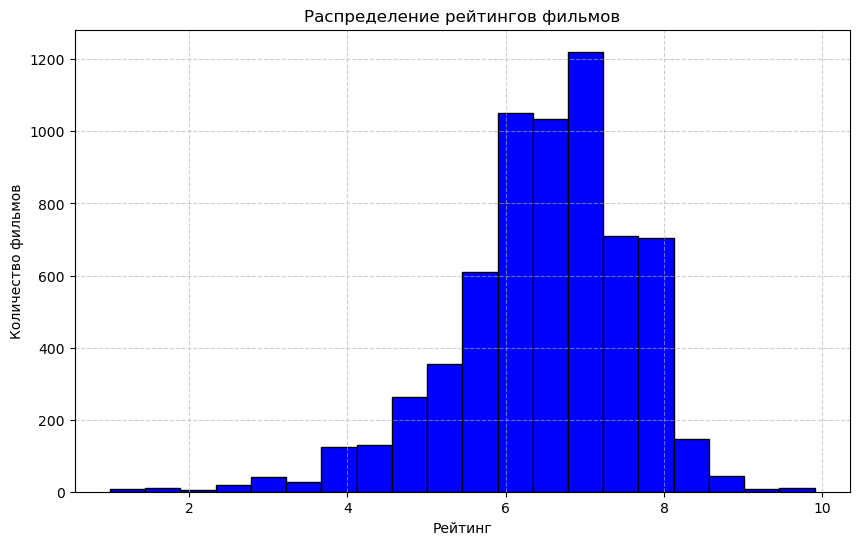

In [15]:
# Создание графика
plt.figure(figsize=(10, 6))
plt.hist(data['ratings'], bins=20, color='blue', edgecolor='black')
plt.title('Распределение рейтингов фильмов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Выглядит так, как мы хотели.

Проверим типы данных столбцов.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [17]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


Теперь все типы данных кажутся корректными. Можно двигаться дальше.

### Изучим пропуски в датафрейме

Объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [18]:
# Общее количество строк до обработки пропусков
len(data)

7486

Найдем общее количество пропусков по столбцам.

In [19]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Получили довольно много столбцов с пропусками.<br>
Будем обрабатывать их постепенно.

Рассмотрим столбцы `film_studio`, `production_country`, `director`, `producer` и `genres`. Они имеют тип `object`.<br>
Изначально была идея заполнить пропуски, сгруппировав данные по названию фильма (поскольку они повторяются). Но она не принесла никаких результатов. Поэтому, чтобы не удалять данные, заполним эти пропуски специальным значением "Неизвестно". Это поможет избежать искажения данных, поскольку нет возможности уверенно восстановить пропущенные значения. Структуру идеи я решил оставить.

In [20]:
# Функция для заполнения пропусков с группировкой по названию фильма
def fill_missing_grouped_by_title(df, column):
    # Получаем самое частое значение для каждого фильма
    most_common = df.groupby('title')[column].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Неизвестно")
    # Заполняем пропуски этими значениями
    df[column] = df[column].fillna(most_common)
    return df

In [21]:
# Столбцы, которые будем обрабатывать
columns_to_fill = ['film_studio', 'production_country', 'director', 'producer', 'genres']

# Применяем функцию для каждого столбца
for column in columns_to_fill:
    data = fill_missing_grouped_by_title(data, column)
    
# Проверяем результат заполнения
data[columns_to_fill].isnull().sum()

film_studio           0
production_country    0
director              0
producer              0
genres                0
dtype: int64

Заполнение столбца `ratings` по аналогичной логике (только с медианным значением) тоже не принесло результатов.<br>
Заполнять пропуски медианой по всему столбцу не стоит, ведь тогда данные просто будут вымышленные.<br>
В таком случае логично оставить эти пропуски как есть.

В столбцах `refundable_support`, `nonrefundable_support` и `budget` мы можем заполнить пропуски нулями.<br>
Это будет означать, что фильм не получал государственную поддержку. Поскольку данные в столбце `budget` указаны только для тех фильмов, которые получили государственную поддержку, пропуски тоже логично заполнить нулями.<br>
Однако такой подход сильно повлияет на общее распределение, поскольку пропусков 7154 из 7486, это 95% строк.<br>
В нашем случае логичнее оставить пропуски как есть, чтобы нули не влияли на дальнейший анализ.

Пропуски в столбце `financing_source` можем заполнить специальным значением "Неизвестно", так как они просто говорят нам об отсутствии информации о конкретном источнике государственного финансирования.

In [22]:
# Заполняем пропуски в столбце financing_source
data['financing_source'] = data['financing_source'].fillna('Неизвестно')

# Проверяем результат заполнения
data['financing_source'].isnull().sum()

0

Столбец `box_office` можно так же заполнить нулями. Отсутствие данных может означать, что фильм не собирал средства или данные о сборах отсутствуют. Однако тут ситуация аналогичная бюджету и гос. поддежрке. Так что тут тоже оставим пропуски, как есть.

In [23]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   967
genres                      0
box_office               4328
dtype: int64

In [24]:
# Общее количество строк после обработки пропусков
len(data)

7486

Таким образом, мы заполнили пропуски в категориальных столбцах, используя специальное значение. Столбцы с количественными значениями мы трогать не стали, чтобы не искажать представление о данных.

### Изучим дубликаты в датафрейме
Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [25]:
# Поиск дубликатов
data.duplicated().sum()

0

Явнвых дубликатов в данных не обнаружено.

Причины, по которым могут появляться дубликаты могут быть разные.<br>
Во-первых, дубликаты могут возникать из-за повторного ввода одних и тех же данных, например, разными авторами или системами.<br>
Во-вторых, если данные загружались из разных источников, они могли быть объединены без проверки на уникальность.<br>
В-треьих, возможны случаи, когда в результате сбоев в системе данные могли записаться несколько раз.<br>
На мой взгляд, это основные причины появления дубликатов.

Теперь попробуем найти неявные дубликаты.<br>
Искать будем по столбцам `title` и `puNumber`.<br>
В описании проекта сказано, что у одного фильма может быть несколько прокатных удостоверений. Это немного усложняет задачу.<br> 
Если названия фильмов могут встречаться несколько раз, то уникальным должен быть столбец `puNumber`.<br>
Найдем дубликаты по этому столбцу.

In [26]:
# Поиск дубликатов
duplicates = data[data['puNumber'].duplicated(keep=False)]

# Вывод результатов
print("Найденные дубликаты по столбцу 'puNumber':")
print(duplicates[['title', 'puNumber']])

Найденные дубликаты по столбцу 'puNumber':
                                                  title   puNumber
4638                   Как жениться и остаться холостым  221154310
4639  Иоанна - женщина на папском престоле /По роман...  221154310
5067                                    Анализируй это!  221054410
5068                                     Анализируй то!  221054410


In [27]:
data.query('puNumber == 221154310 or puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Неизвестно,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Неизвестно,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Неизвестно,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Неизвестно,6.80,"комедия,криминал",NaN


Первые два фильма имеют один номер прокатного удостоверения, что является ошибкой. Ошибка в `puNumber` может быть связана с некорректной регистрацией данных или административной ошибкой. Поскольку уточнить информацию мы не можем, сделаем для одного из фильмов уникальное значение `puNumber`. С одной стороны, мы придумываем номер, с другой, фильм останется в нашей выборке. Ведь не так важно, какой у него будет номер, главное, что он будет уникальным.<br>
Вторая пара очевидно продублировалась, необходимо удалить строку с названием фильма "Анализируй то!".

In [28]:
# Меняем номер прокатного удостоверения у первого фильма на максимальный + 1, чтобы он стал уникальным
data.loc[4638, 'puNumber'] = data['puNumber'].max() + 1

# Удаляем строку номер 5068
data = data.drop(5068)

# Сбрасываем индексы
data = data.reset_index(drop=True)

Теперь убедимся, что столбец `puNumber` уникален.

In [29]:
# Поиск дубликатов
duplicates = data[data['puNumber'].duplicated(keep=False)]

# Вывод результатов
print("Найденные дубликаты по столбцу 'puNumber':")
print(duplicates[['title', 'puNumber']])

Найденные дубликаты по столбцу 'puNumber':
Empty DataFrame
Columns: [title, puNumber]
Index: []


В этом блоке мы обработали дубликаты. Явных дублей не было обнаружено, однако нашлась пара неявных дублей, которые мы успешно обработали. Первому дублю мы присвоили новый номер прокатного удостоверения, поскольку фильмы были разные. Второй дубль мы исключили из выборки.

### Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в столбце `type`.

Рассмотрим уникальные значения в категориальных столбцах.

In [30]:
data['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [31]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [32]:
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [33]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [34]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [35]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'Неизвестно',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [36]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [37]:
data['financing_source'].unique()

array(['Неизвестно', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [38]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

Проблема, которая встречается в некоторых категориальных столбцах, - это пробелы в начале или конце строки.<br>
Поскольку в некоторых столбцах довольно много значений, уберем пробелы во всех категориальных столбцах.

In [39]:
# Удаление пробелов в категориальных столбцах
categorical_columns = ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'genres']
for column in categorical_columns:
    data[column] = data[column].str.strip()

# Проверка уникальных значений в столбце type
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Проблема, которая встречалась в некоторых категориальных столбцах, - это пробелы в начале или конце строки. <br>
В этом блоке мы убрали пробелы в начале и конце строки у всех категориальных столбцов.

### Проверим количественные значения

Проверим, обнаружились ли в таких столбцах подозрительные данные, и обработаем их при необходимости.

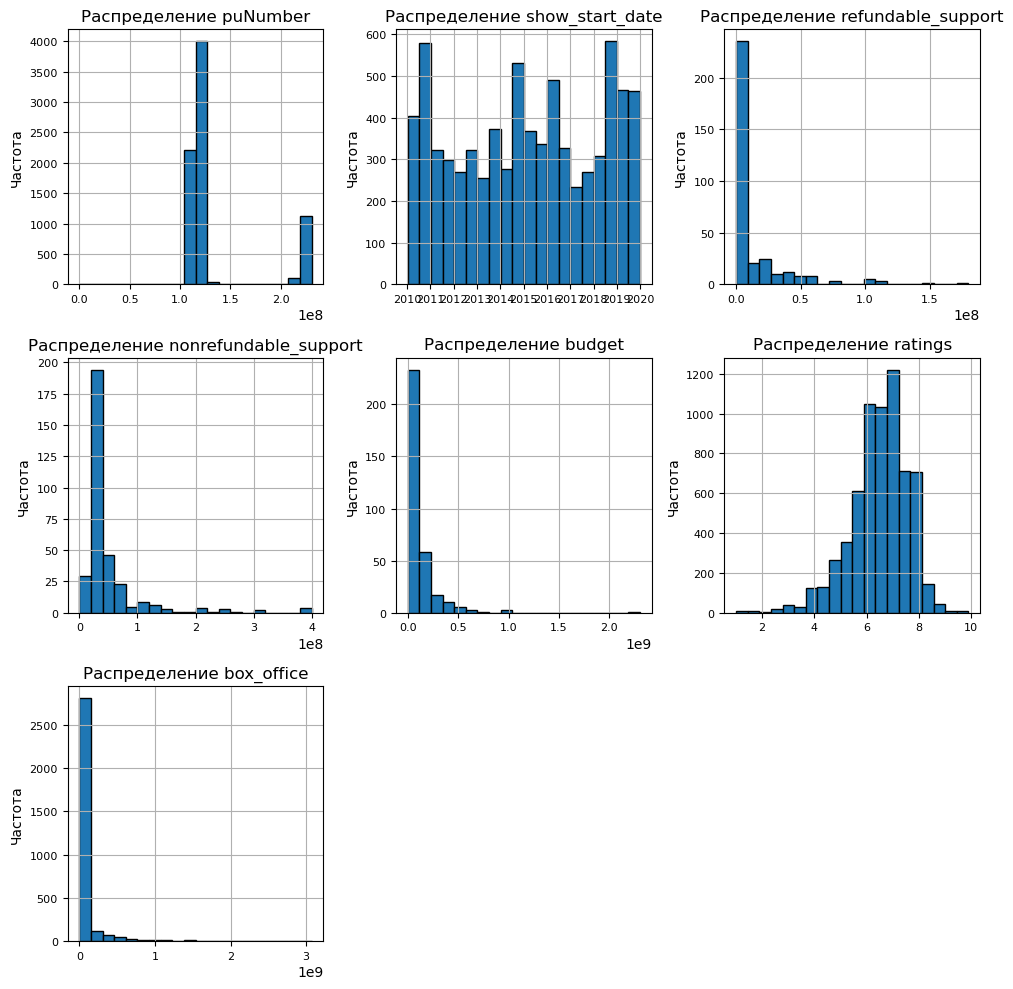

In [40]:
# Построение гистограмм для всех числовых столбцов
axes = data.hist(figsize=(10, 10), bins=20, edgecolor='black', xlabelsize=8, ylabelsize=8)

# Добавление подписей и названий к каждому графику
for ax_array in axes:
    for ax in ax_array:
        ax.set_title('Распределение ' + ax.get_title())
        ax.set_xlabel(ax.get_xlabel())
        ax.set_ylabel('Частота')

# Настройка вывода графиков
plt.tight_layout()
plt.show()

Столбцы `puNumber` и `show_start_date` мы не будем трогать. В них просто записаны номер прокатного удостоверения и дата премьеры фильма.

Столбец `ratings` мы обработали заранее. Значения в нем выглядят вполне адеватно.

Рассмотрим подробнее столбцы `budget`, `refundable_support` и `nonrefundable_support`.

#### Столбец `budget`

In [41]:
data['budget'].describe()

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

Переведем эти значения в миллионы, чтобы было удобнее работать.

In [42]:
data['budget_in_millions'] = data['budget'] / 1000000
data['budget_in_millions'].describe()

count     332.00
mean      127.23
std       188.59
min         0.00
25%        42.00
50%        68.65
75%       141.99
max     2,305.07
Name: budget_in_millions, dtype: float64

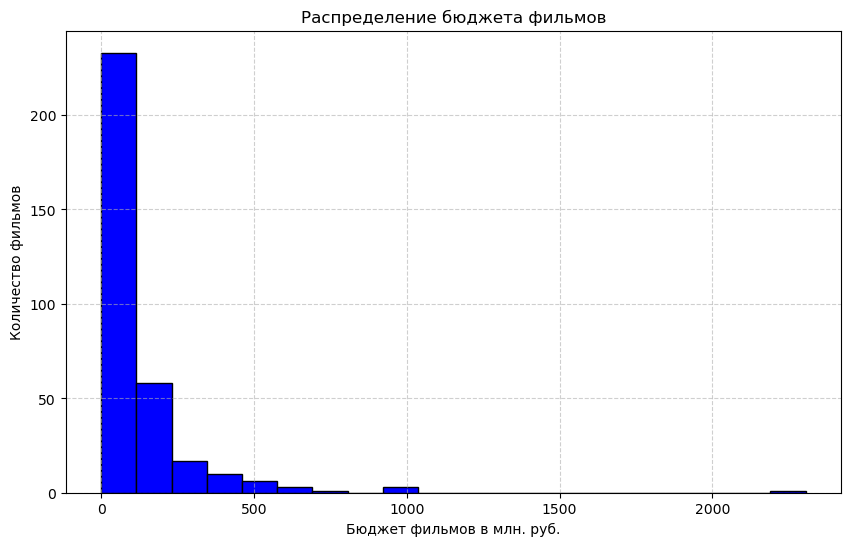

In [43]:
# Создание графика
plt.figure(figsize=(10, 6))
plt.hist(data['budget_in_millions'], bins=20, color='blue', edgecolor='black')
plt.title('Распределение бюджета фильмов')
plt.xlabel('Бюджет фильмов в млн. руб.')
plt.ylabel('Количество фильмов')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Максимальное значение - 2305. Выглядит аномально. Посмотрим, сколько значений больше 1000.

In [44]:
data.query('budget_in_millions > 1000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_in_millions
5436,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,7.70,"фэнтези,комедия,семейный","511,775,548.00","1,032.91"
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59","2,305.07"


Судя по Кинопоиску, у фильма <i>Матильда</i> бюджет составил 25 млн долларов https://www.kinopoisk.ru/film/705382/?ysclid=lvl41pni883044875&utm_referrer=ya.ru.<br>
С учетом курса 2017 года предположим, что эти данные правдивы.<br>
Фильм <i>Тайна Печати Дракона</i> имел бюджет 2,8 млрд рублей https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B9%D0%BD%D0%B0_%D0%BF%D0%B5%D1%87%D0%B0%D1%82%D0%B8_%D0%B4%D1%80%D0%B0%D0%BA%D0%BE%D0%BD%D0%B0.
Оставим эти данные как действительные.

In [45]:
# Подсчет строк, где бюджет больше нуля
(data['budget_in_millions'] > 0).sum()

315

In [46]:
# Подсчет строк, где бюджет равен нулю
(data['budget_in_millions'] == 0).sum()

17

In [47]:
data.query('budget_in_millions == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_in_millions
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",0.00
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",0.00
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",0.00
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",0.00
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",0.00
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51",0.00
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20",0.00
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",0.00
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",0.00
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00",0.00


Избавимся от этих данных, поскольку они выглядят аномально.

In [48]:
data = data.query('budget_in_millions != 0')

In [49]:
data['budget_in_millions'].describe()

count     315.00
mean      134.10
std       191.23
min        14.46
25%        46.15
50%        73.38
75%       150.00
max     2,305.07
Name: budget_in_millions, dtype: float64

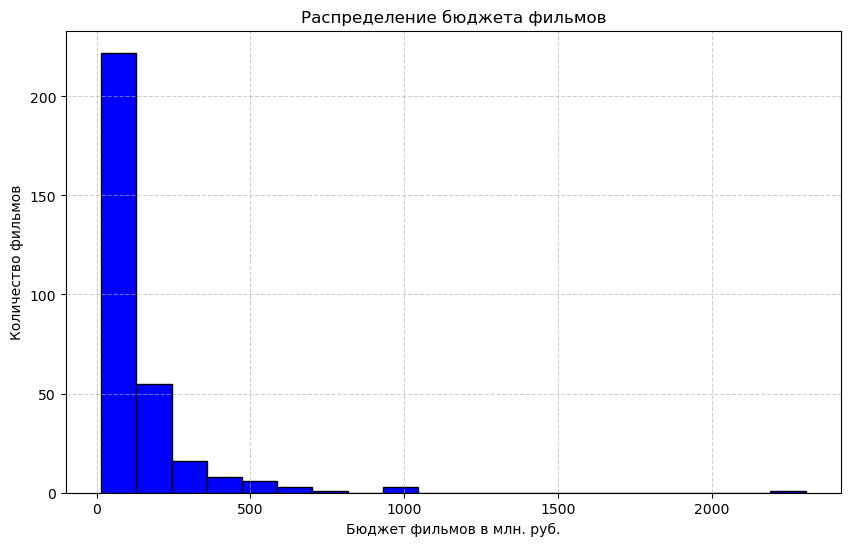

In [50]:
# # Построение гистограммы для бюджета фильмов
plt.figure(figsize=(10, 6))
plt.hist(data['budget_in_millions'], bins=20, color='blue', edgecolor='black')
plt.title('Распределение бюджета фильмов')
plt.xlabel('Бюджет фильмов в млн. руб.')
plt.ylabel('Количество фильмов')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Столбец `refundable_support`

Теперь рассмотрим столбец `refundable_support`.

In [51]:
data['refundable_support'].describe()

count           315.00
mean     11,603,174.60
std      25,151,438.82
min               0.00
25%               0.00
50%               0.00
75%      10,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

Аналогично переведем числа в миллионы.

In [52]:
data['refundable_support_in_millions'] = data['refundable_support'] / 1000000
data['refundable_support_in_millions'].describe()

count   315.00
mean     11.60
std      25.15
min       0.00
25%       0.00
50%       0.00
75%      10.00
max     180.00
Name: refundable_support_in_millions, dtype: float64

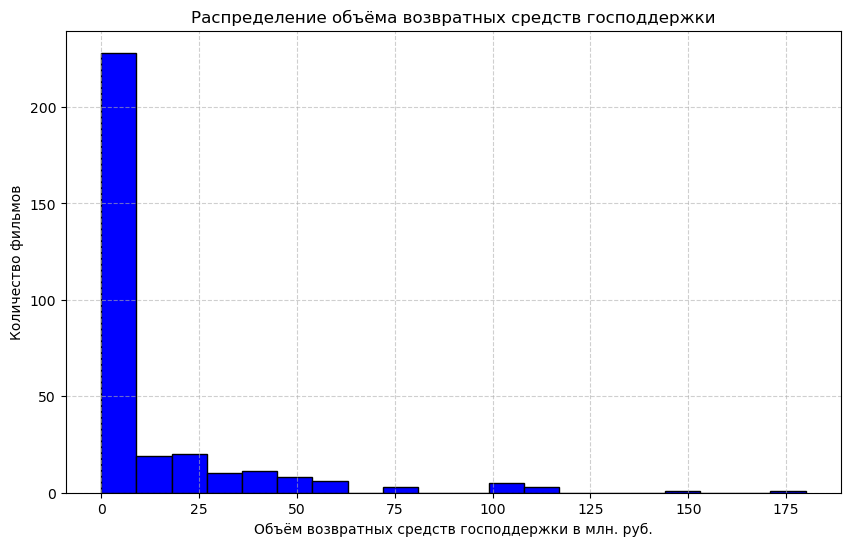

In [53]:
# Построение гистограммы для объёма возвратных средств гос. поддержки
plt.figure(figsize=(10, 6))
plt.hist(data['refundable_support_in_millions'], bins=20, color='blue', edgecolor='black')
plt.title('Распределение объёма возвратных средств господдержки')
plt.xlabel('Объём возвратных средств господдержки в млн. руб.')
plt.ylabel('Количество фильмов')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Посмотрим, сколько строк имеют объем возвратных средств гос. поддержки больше 100 млн.

In [54]:
data.query('refundable_support_in_millions > 100')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_in_millions,refundable_support_in_millions
3164,Герой (2015),111000416,2016-01-22 12:00:00+00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ""...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+» - для детей старше 12 лет,"110,000,000.00","30,000,000.00","222,177,790.00","Министерство культуры, Фонд кино",7.10,"мюзикл,боевик,драма","81,430,626.82",222.18,110.00
3351,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00","300,000,000.00","684,200,536.00",Фонд кино,6.60,драма,"364,285,139.60",684.20,150.00
5436,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,7.70,"фэнтези,комедия,семейный","511,775,548.00","1,032.91",110.00
6471,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"115,000,000.00",0.00,"185,500,705.00",Фонд кино,6.50,"мультфильм,приключения,семейный","577,368,853.25",185.50,115.00
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59","2,305.07",180.00


Здесь есть уже знакомые нам фильмы и несколько новых.

In [55]:
# Подсчет строк с нулевым значением столбца
(data['refundable_support_in_millions'] == 0).sum()

214

Большую часть данных занимают нулевые значения. Это может говорить об отсутствии финансирования фильмов.

#### Столбец `nonrefundable_support`

Теперь рассмотрим столбец `nonrefundable_support`.

In [56]:
# Проведем аналогичные действия со столбцом nonrefundable_support
data['nonrefundable_support_in_millions'] = data['nonrefundable_support'] / 1000000
data['nonrefundable_support_in_millions'].describe()

count   315.00
mean     48.11
std      59.89
min       0.00
25%      25.00
50%      30.00
75%      40.00
max     400.00
Name: nonrefundable_support_in_millions, dtype: float64

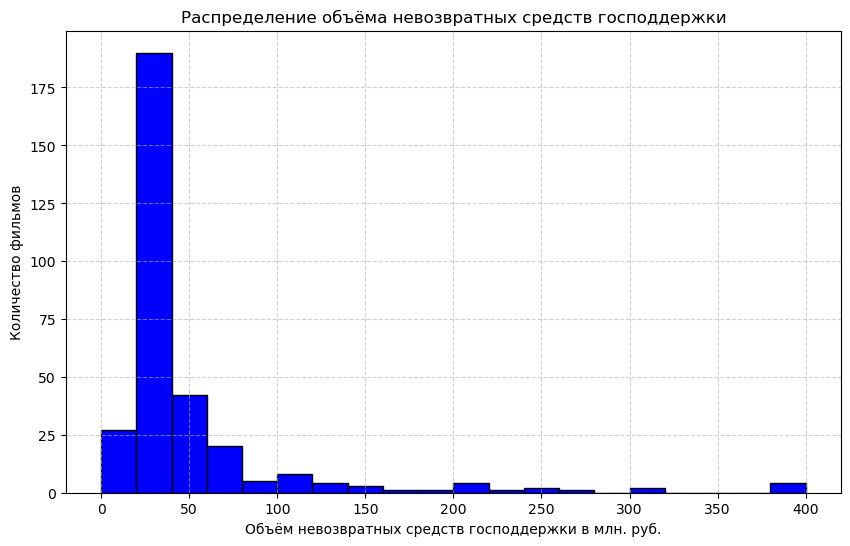

In [57]:
# Построение гистограммы для объёма невозвратных средств гос. поддержки
plt.figure(figsize=(10, 6))
plt.hist(data['nonrefundable_support_in_millions'], bins=20, color='blue', edgecolor='black')
plt.title('Распределение объёма невозвратных средств господдержки')
plt.xlabel('Объём невозвратных средств господдержки в млн. руб.')
plt.ylabel('Количество фильмов')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Минимальное значение - 0, что также может говорить об отсутствии финансирования фильмов. Но таких значений в этом столбце гораздо меньше. В целом, значения выглядят адекватно.

#### Столбец `box_office`

Остался столбец `box_office` - сборы в рублях.

In [58]:
# Проведем аналогичные действия со столбцом box_office
data['box_office_in_millions'] = data['box_office'] / 1000000
data['box_office_in_millions'].describe()

count   3,141.00
mean       76.01
std       240.25
min         0.00
25%         0.08
50%         2.28
75%        23.44
max     3,073.57
Name: box_office_in_millions, dtype: float64

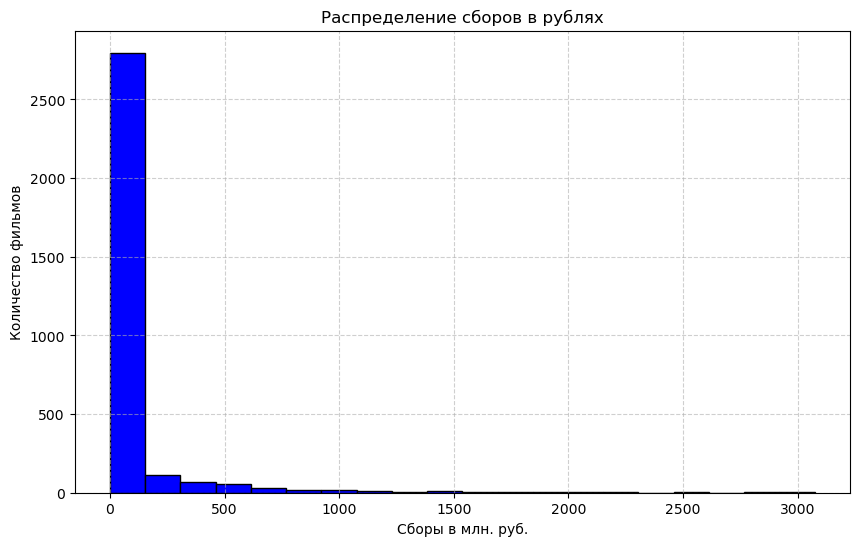

In [59]:
# Построение гистограммы для сборов в рублях
plt.figure(figsize=(10, 6))
plt.hist(data['box_office_in_millions'], bins=20, color='blue', edgecolor='black')
plt.title('Распределение сборов в рублях')
plt.xlabel('Cборы в млн. руб.')
plt.ylabel('Количество фильмов')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Минимальное значение - ноль, а максимальное - более трех миллиадров рублей.

In [60]:
data.query('box_office_in_millions > 3000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_in_millions,refundable_support_in_millions,nonrefundable_support_in_millions,box_office_in_millions
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79",160.00,25.00,35.00,"3,073.57"


Судя по Кинопоиску https://www.kinopoisk.ru/film/1183582/, оставим данные как есть.

In [61]:
# Подсчет строк с нулевым значением столбца
(data['box_office_in_millions'] == 0).sum()

24

Строк с нулевым значением не так много. Хоть они и выглядят аномально, оставим их как есть. 

### Добавим новые столбцы

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [62]:
# Создание столбца с годом проката
data['year_of_release'] = data['show_start_date'].dt.year

# Просмотр первых строк таблицы для проверки нового столбца
data[['show_start_date', 'year_of_release']].head()

,show_start_date,year_of_release
0,2015-11-27 12:00:00+00:00,2015
1,2016-09-13 12:00:00+00:00,2016
2,2016-10-10 12:00:00+00:00,2016
3,2016-06-10 12:00:00+00:00,2016
4,2015-07-29 12:00:00+00:00,2015


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [63]:
# Определение функции для извлечения первого элемента из списка с проверкой на NaN (на всякий случай)
def extract_first_element(text):
    if pd.notna(text):
        return text.split(',')[0].strip()
    return None

In [64]:
# Применение функции к столбцу с режиссёрами и жанрами
data['main_director'] = data['director'].apply(extract_first_element)
data['main_genre'] = data['genres'].apply(extract_first_element)

# Просмотр первых строк таблицы для проверки новых столбцов
data[['director', 'main_director', 'genres', 'main_genre']].head()

,director,main_director,genres,main_genre
0,Кевин Костнер,Кевин Костнер,"боевик,драма,мелодрама",боевик
1,Е.Матвеев,Е.Матвеев,"драма,военный",драма
2,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
3,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
4,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

Тут будем считать, что государственная поддержка включает как возвращаемую, так и невозвращаемую помощь.<br>
Сумма этих двух компонентов будет поделена на общий бюджет фильма. Ранее мы убрали строки, где бюджет равен нулю, поэтому можем спокойно делить на него.

In [65]:
# Расчет доли государственной поддержки от общего бюджета
data['gov_support_ratio'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

# Просмотр первых строк таблицы для проверки нового столбца
data.query('gov_support_ratio > 0').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_in_millions,refundable_support_in_millions,nonrefundable_support_in_millions,box_office_in_millions,year_of_release,main_director,main_genre,gov_support_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",79.41,0.00,26.50,0.37,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,Неизвестно,"28,140.00",37.14,0.00,26.00,0.03,2014,А.Якимчук,Неизвестно,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",176.02,0.00,107.85,19.96,2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",40.57,0.00,28.00,0.06,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",40.02,0.00,25.00,0.23,2014,М.Угаров,драма,0.62


В этом разделе мы выполнили предобработку данных.<br>
Во-первых, мы изменили типы данных там, где было нужно. Затем убрали пропуски в категориальных столбцах, а в числовых оставили как есть, чтобы не искажать данные. После этого изучили и убрали дубликаты в столбцах `title` и `puNumber`. Так же мы изучили основную проблему категориальных столбцов - пробелы в начале и конце строки и исправили её. Далее мы рассмторели количественные столбцы и обработали аномальные значения в них. В конце мы добавили новые столбцы с годом проката, главным режиссёром, основным жанром для более глубокого анализа, а так же с расчетом доли государственной поддержки от общего бюджета фильмов.

## Проведем исследовательский анализ данных

### Доля фильмов с кассовыми сборами

- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

In [66]:
# Подсчёт количества фильмов по годам
films_per_year = data['year_of_release'].value_counts().sort_index()
films_per_year

year_of_release
2010    984
2011    622
2012    593
2013    630
2014    806
2015    699
2016    815
2017    503
2018    887
2019    929
Name: count, dtype: int64

In [67]:
# Подсчёт количества фильмов с информацией о кассовых сборах по годам
films_with_box_office_per_year = data[data['box_office_in_millions'] > 0]['year_of_release'].value_counts().sort_index()
films_with_box_office_per_year

year_of_release
2010    101
2011    109
2012    123
2013    179
2014    272
2015    456
2016    522
2017    355
2018    471
2019    529
Name: count, dtype: int64

In [68]:
# Расчет доли фильмов с кассовыми сборами
ratio_of_films_with_box_office = films_with_box_office_per_year / films_per_year
ratio_of_films_with_box_office

year_of_release
2010   0.10
2011   0.18
2012   0.21
2013   0.28
2014   0.34
2015   0.65
2016   0.64
2017   0.71
2018   0.53
2019   0.57
Name: count, dtype: float64

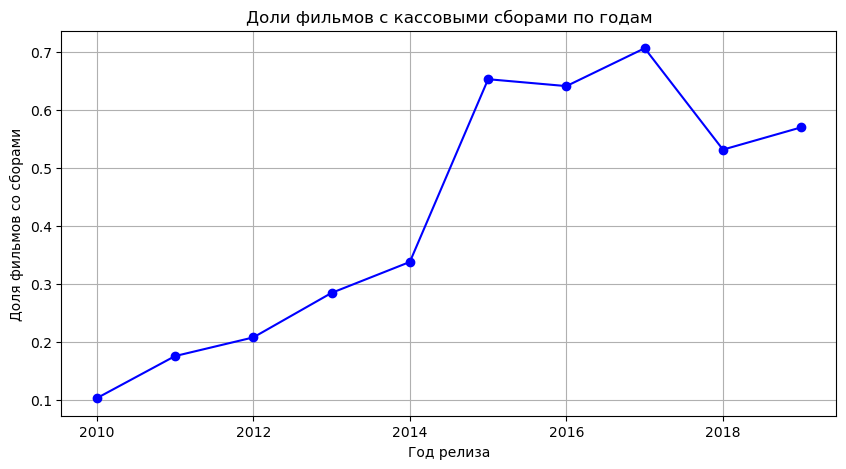

In [69]:
# Создание графика
plt.figure(figsize=(10, 5))
plt.plot(ratio_of_films_with_box_office.index, ratio_of_films_with_box_office.values, marker='o', linestyle='-', color='b')
plt.title('Доли фильмов с кассовыми сборами по годам')
plt.xlabel('Год релиза')
plt.ylabel('Доля фильмов со сборами')
plt.grid(True)
plt.show()

По результатам видим низкие значения в ранние годы (2010-2014). Это может говорить о том, что за этот период меньшее количество фильмов регистрировало кассовые сборы либо данные о кассовых сборах хуже сохранялись. <br>
Доля фильмов с информацией о кассовых сборах за период 2015-2017 значительно увеличилась, что может говорить о лучшей организации сбора и сохранения данных.<br>
Доля снизилась в 2018-2019 годы. Падение доли может быть связано с различными факторами, например, экономические условия или изменение популярности кинотеатров.<br>
По результатам анализа можно предположить, что данные за период с 2015 по 2017 год являются наиболее полными и надежными в отношении информации о кассовых сборах. 

###  Динамика проката по годам

- Изучим, как менялась динамика проката по годам. Найдем, в каком году сумма сборов была минимальной и максимальной.

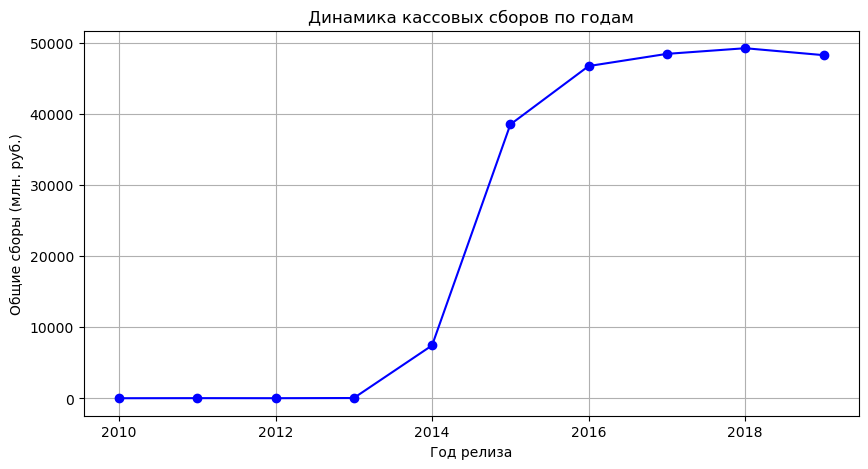

In [70]:
# Группировка по году релиза и подсчёт суммы сборов
total_box_office_per_year = data.groupby('year_of_release')['box_office_in_millions'].sum()

# Создание графика
plt.figure(figsize=(10, 5))
plt.plot(total_box_office_per_year.index, total_box_office_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Динамика кассовых сборов по годам')
plt.xlabel('Год релиза')
plt.ylabel('Общие сборы (млн. руб.)')
plt.grid(True)
plt.show()

In [71]:
# Определение года с минимальной и максимальной суммой сборов
min_box_office_year = total_box_office_per_year.idxmin()
max_box_office_year = total_box_office_per_year.idxmax()

# Вывод результатов
print(f"Год с минимальной суммой сборов: {min_box_office_year}, сумма сборов: {total_box_office_per_year[min_box_office_year]} млн. руб.")
print(f"Год с максимальной суммой сборов: {max_box_office_year}, сумма сборов: {total_box_office_per_year[max_box_office_year]} млн. руб.")

Год с минимальной суммой сборов: 2010, сумма сборов: 2.428654 млн. руб.
Год с максимальной суммой сборов: 2018, сумма сборов: 49251.9914052 млн. руб.


Из графика видно, что кассовые сборы значительно возросли, начиная с 2014 года, и достигли пика в 2018 году. После этого наблюдается стабилизация на высоком уровне в течение следующего года. <br>
Поскольку информации о кассовых сборах в ранние годы было меньше, график может искажать реальное представление о динамике. Так же на суммы сборов в ранние годы могли влиять другие факторы, например, экономические или популярность кинотеатров.

### Средняя и медианная сумма сборов для каждого года

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [72]:
# Создание сводной таблицы для расчета средней и медианной суммы сборов по годам
pivot_table = data.pivot_table(values='box_office_in_millions', index='year_of_release', aggfunc=['mean', 'median'])

# Переименование столбцов для лучшей читаемости
pivot_table.columns = ['Average Box Office in Millions', 'Median Box Office in Millions']
pivot_table

,Average Box Office in Millions,Median Box Office in Millions
year_of_release,,
2010,0.02,0.00
2011,0.13,0.00
2012,0.05,0.01
2013,0.16,0.00
2014,26.74,0.02
2015,83.94,4.78
2016,89.37,3.78
2017,136.50,9.92
2018,104.57,8.75


Здесь мы можем сделать аналогичные выводы. Начиная с 2014 года, средние сборы значительно возросли, достигнув пика в 2017 году.  В 2017 году были зафиксированы максимальные средние сборы. После 2017 года наблюдается снижение средних сборов.<br>
Разрыв между средними и медианными значениями, особенно заметный в годах с высокими средними сборами (2014, 2015, 2017), подчеркивает влияние нескольких очень успешных фильмов, которые сильно увеличили средние значения.

### Влияние возрастного ограничения на сборы фильмов

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Найдем, фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Узнаем, меняется ли картина в зависимости от года, Предположим, с чем это может быть связано.

In [73]:
# Фильтрация данных по годам 2015-2019
filtered_data = data[(data['year_of_release'] >= 2015) & (data['year_of_release'] <= 2019)]

# Группировка данных по возрастному ограничению и году, подсчет суммы сборов
grouped_data = filtered_data.groupby(['age_restriction', 'year_of_release'])['box_office_in_millions'].sum().unstack()

print("\nГодовые сборы по возрастным ограничениям (в млн. руб.):")
grouped_data


Годовые сборы по возрастным ограничениям (в млн. руб.):


year_of_release,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,379.05,150.23,229.60,32.45,17.75
«12+» - для детей старше 12 лет,"13,419.51","11,150.76","7,851.43","14,267.29","12,680.20"
«16+» - для детей старше 16 лет,"10,781.60","16,594.25","18,694.59","16,278.41","12,753.42"
«18+» - запрещено для детей,"5,430.35","6,793.93","9,651.50","8,760.09","10,121.80"
«6+» - для детей старше 6 лет,"8,517.31","12,053.15","12,031.03","9,913.76","12,704.94"


In [74]:
# Сортировка и вывод результатов для каждого возрастного ограничения по сумме сборов
sorted_data = grouped_data.sum(axis=1).sort_values(ascending=False)
print("Суммарные сборы по возрастным ограничениям с 2015 по 2019 год:")
sorted_data

Суммарные сборы по возрастным ограничениям с 2015 по 2019 год:


age_restriction
«16+» - для детей старше 16 лет          75,102.27
«12+» - для детей старше 12 лет          59,369.19
«6+» - для детей старше 6 лет            55,220.19
«18+» - запрещено для детей              40,757.66
«0+» - для любой зрительской аудитории      809.08
dtype: float64

Ограничение "«16+» - для детей старше 16 лет" имеет самые высокие сборы среди всех возрастных категорий, достигая более 75 млрд рублей. Это может быть связано с тем, что фильмы этой категории часто включают популярные жанры для широкой аудитории, такие как боевики, триллеры и драмы, которые привлекают как подростков, так и взрослых.

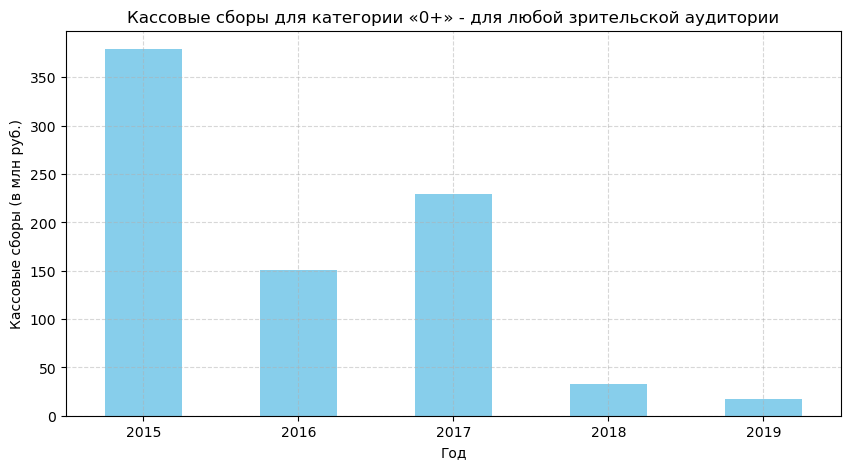

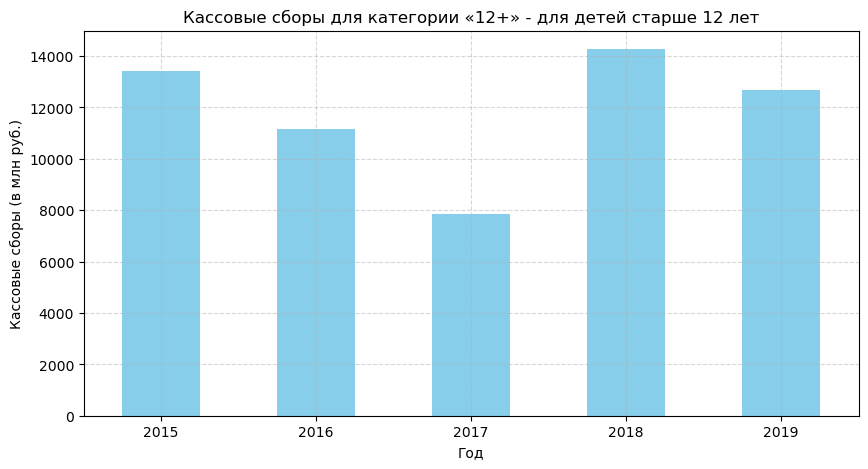

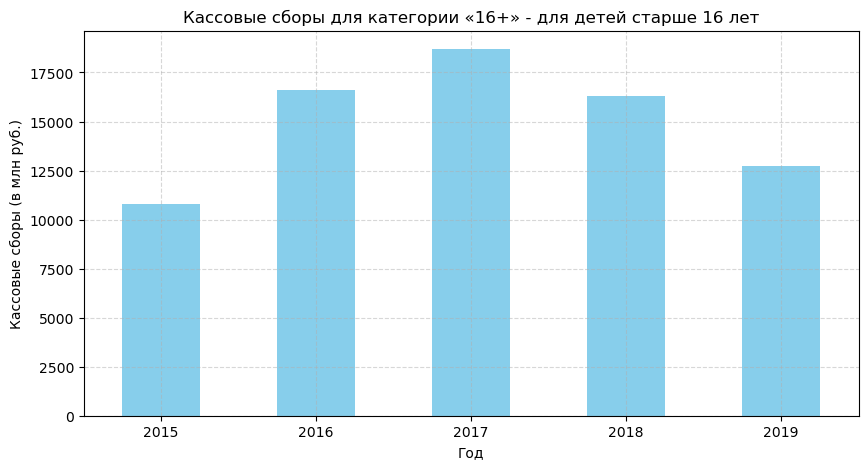

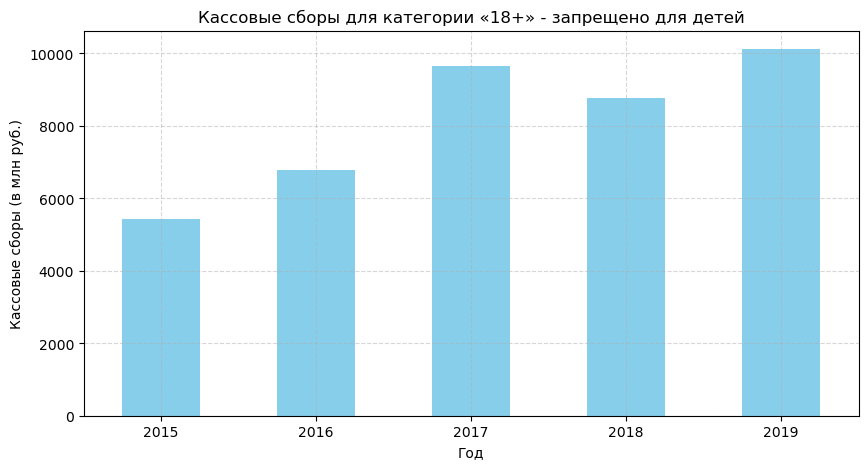

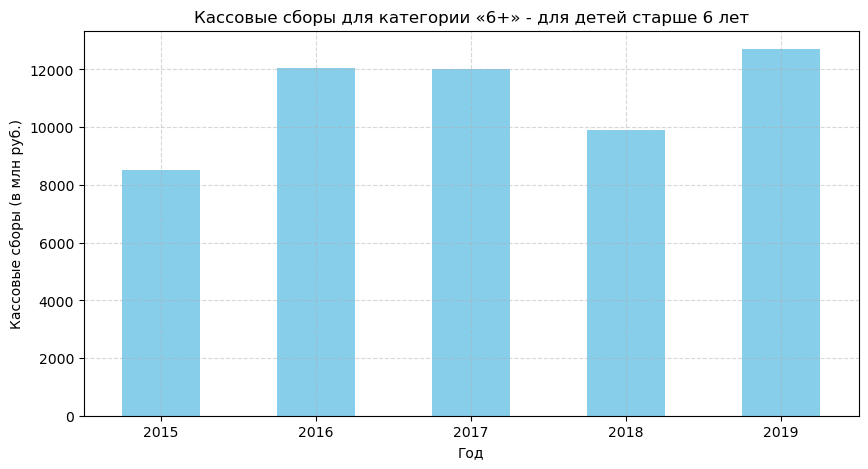

In [75]:
# Создание отдельных графиков для каждой возрастной категории
for category in grouped_data.index:
    plt.figure(figsize=(10, 5))
    grouped_data.loc[category].plot(kind='bar', color='skyblue')
    plt.title(f'Кассовые сборы для категории {category}')
    plt.xlabel('Год')
    plt.ylabel('Кассовые сборы (в млн руб.)')
    plt.xticks(rotation=0)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

- Категория «0+»: Наблюдается значительное снижение кассовых сборов после 2015 года, что может быть связано с уменьшением числа фильмов, подходящих для всех возрастных групп, или изменением интересов аудитории;
- Категория «12+»: Эта категория показывает колебания, но в целом удерживает высокий уровень сборов, особенно в 2018 году;
- Категория «16+»: Здесь виден рост сборов до 2017 года с последующим небольшим снижением, что тоже может говорить об изменении интересов аудитории;
- Категория «18+»: Стабильный рост сборов, особенно заметный скачок в 2017 году;
- Категория «6+»: Колебания с тенденцией к росту в последние годы, достигая пика в 2019 году.

Фильмы с возрастным ограничением «16+» и «12+» доминируют на рынке. Это может говорить о предпочтениях большей части зрительской аудитории или же успешности маркетинговых стратегий для привлечения этой аудитории.<br>
Низкие сборы в категории «0+» могут указывать на то, что такие фильмы либо выходят реже, либо не находят отклика у аудитории.

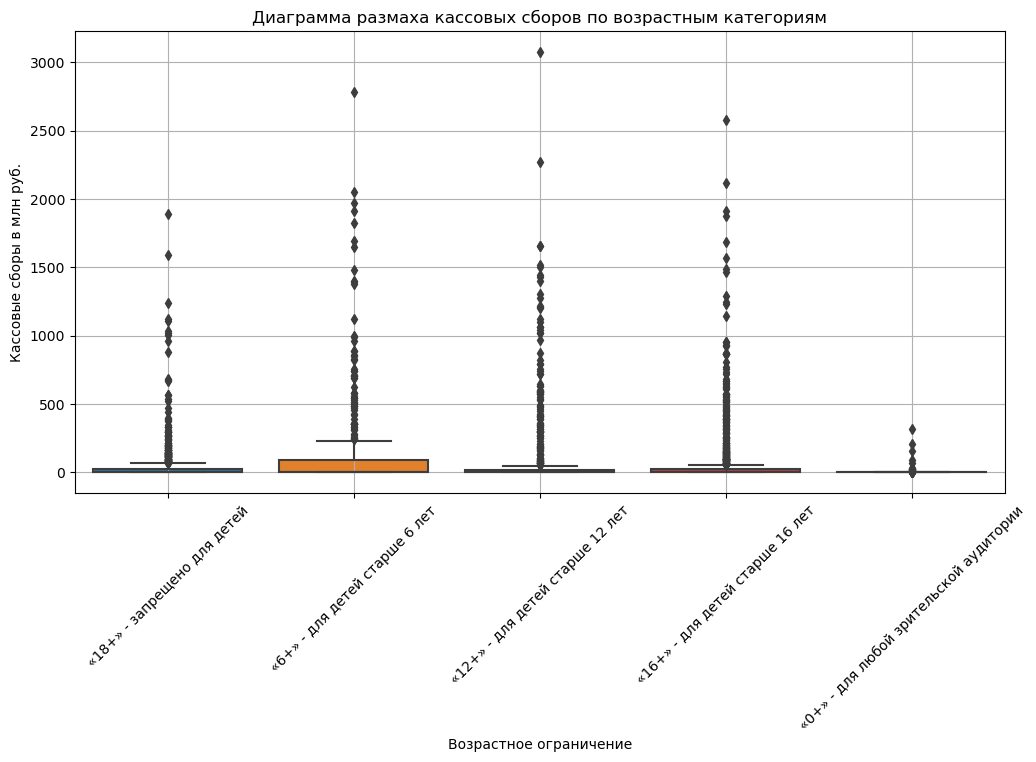

In [76]:
# Создание диаграммы размаха
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_restriction', y='box_office_in_millions', data=data)  # Создание диаграммы размаха

# Настройка визуализации
plt.title('Диаграмма размаха кассовых сборов по возрастным категориям')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Кассовые сборы в млн руб.')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

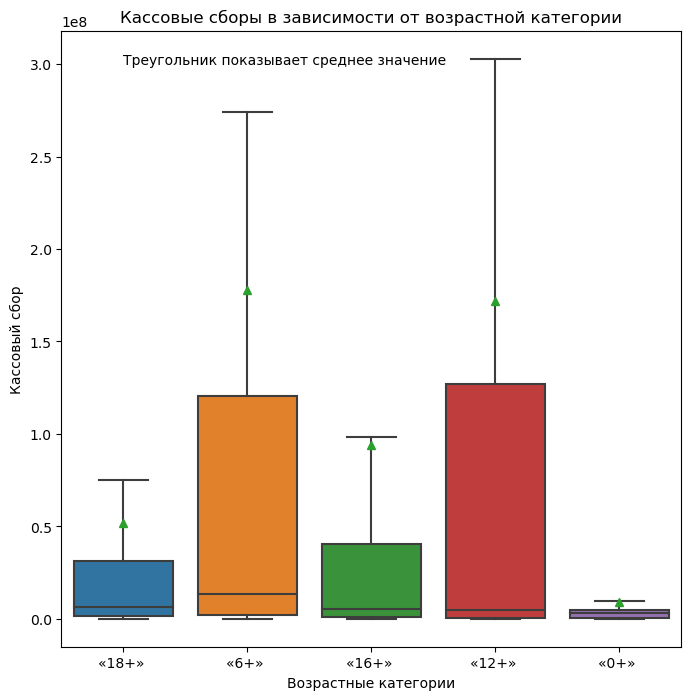

In [77]:
# Способ 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year_of_release'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.0e8,'Треугольник показывает среднее значение')
plt.show()

Большинство категорий имеет широкое распределение сборов, с множеством выбросов, указывающих на то, что отдельные фильмы значительно превосходят средние показатели по своим категориям. Наличие выбросов особенно заметно для всех категорий, что говорит о наличии фильмов-блокбастеров, существенно увеличивающих максимальные сборы в каждой категории.<br>
Медианы кассовых сборов во всех категориях, кроме «0+», находятся близко к нижней части диапазона, что указывает на то, что большинство фильмов в каждой категории собирают сравнительно небольшие суммы. Отдельные успешные фильмы являются исключениями, что подтверждает наличие длинных "усов" и выбросов выше верхней границы квартилей.
Категория «0+» имеет относительно низкий верхний квартиль и медиану, что говорит о невысоком коммерческом потенциале фильмов этой категории. Также заметно отсутствие выбросов в этой категории, что может указывать на более стабильные, но низкие сборы.

В данном разделе мы провели исследовательский анализ данных.<br>
Во-первых, мы рассчитали долю фильмов с кассовыми сборами. По результатам анализа можно предположить, что данные за период с 2015 по 2017 год являются наиболее полными и надежными в отношении информации о кассовых сборах.<br>
Во-вторых, мы рассмотрели динамику проката по годам. Узнали, что кассовые сборы значительно возросли, начиная с 2014 года, и достигли пика в 2018 году. После этого наблюдается стабилизация на высоком уровне в течение следующего года.<br>
В-третьих, изучили среднюю и медианную сумму сборов для каждого года. Начиная с 2014 года, средние сборы значительно возросли, достигнув пика в 2017 году. В 2017 году были зафиксированы максимальные средние сборы. После 2017 года наблюдается снижение средних сборов. Разрыв между средними и медианными значениями, особенно заметный в годах с высокими средними сборами (2014, 2015, 2017), подчеркивает влияние нескольких очень успешных фильмов, которые сильно увеличили средние значения.<br>
В-четвертых, мы выяснили, что возрастное ограничение влияет на сборы фильмов. Фильмы с возрастным ограничением «16+» и «12+» доминируют на рынке. Это может говорить о предпочтениях большей части зрительской аудитории или же успешности маркетинговых стратегий для привлечения этой аудитории. Низкие сборы в категории «0+» могут указывать на то, что такие фильмы либо выходят реже, либо не находят отклика у аудитории.

## Исследуем фильмы, которые получили государственную поддержку

Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы и какой у них рейтинг.

In [78]:
# Подсчёт общей господдержки
data['total_support'] = data['refundable_support_in_millions'] + data['nonrefundable_support_in_millions']

# Отфильтруем данные, где есть поддержка
supported_films = data[data['total_support'] > 0]

# Средние значения окупаемости и рейтингов
average_box_office = supported_films['box_office_in_millions'].mean()
average_support = supported_films['total_support'].mean()
average_rating = supported_films['ratings'].mean()

# Печать результатов
print(f"Средняя сумма господдержки (в млн. руб.): {average_support}")
print(f"Средние кассовые сборы (в млн. руб.): {average_box_office}")
print(f"Средний рейтинг фильмов с господдержкой: {average_rating}")


Средняя сумма господдержки (в млн. руб.): 59.71021856190476
Средние кассовые сборы (в млн. руб.): 130.6982577061462
Средний рейтинг фильмов с господдержкой: 6.036666666666667


In [79]:
# Группировка по годам
grouped = supported_films.groupby('year_of_release').agg({
    'total_support': 'mean',
    'box_office_in_millions': 'mean',
    'ratings': 'mean'
}).reset_index()
grouped

,year_of_release,total_support,box_office_in_millions,ratings
0,2013,67.17,10.16,6.70
1,2014,36.60,67.15,5.96
2,2015,40.34,60.96,6.14
3,2016,68.57,86.98,5.69
4,2017,79.46,290.80,6.05
5,2018,59.58,183.03,6.04
6,2019,68.46,140.03,6.18


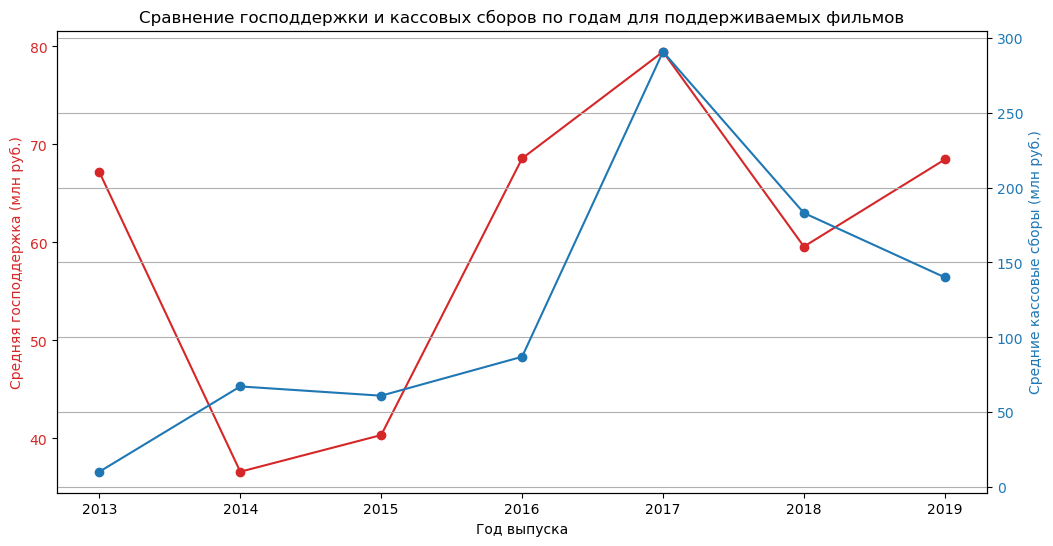

In [80]:
# Визуализация результатов
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Год выпуска')
ax1.set_ylabel('Средняя господдержка (млн руб.)', color=color)
ax1.plot(grouped['year_of_release'], grouped['total_support'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # создаем вторую ось
color = 'tab:blue'
ax2.set_ylabel('Средние кассовые сборы (млн руб.)', color=color)
ax2.plot(grouped['year_of_release'], grouped['box_office_in_millions'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Сравнение господдержки и кассовых сборов по годам для поддерживаемых фильмов')
plt.grid(True)
plt.show()

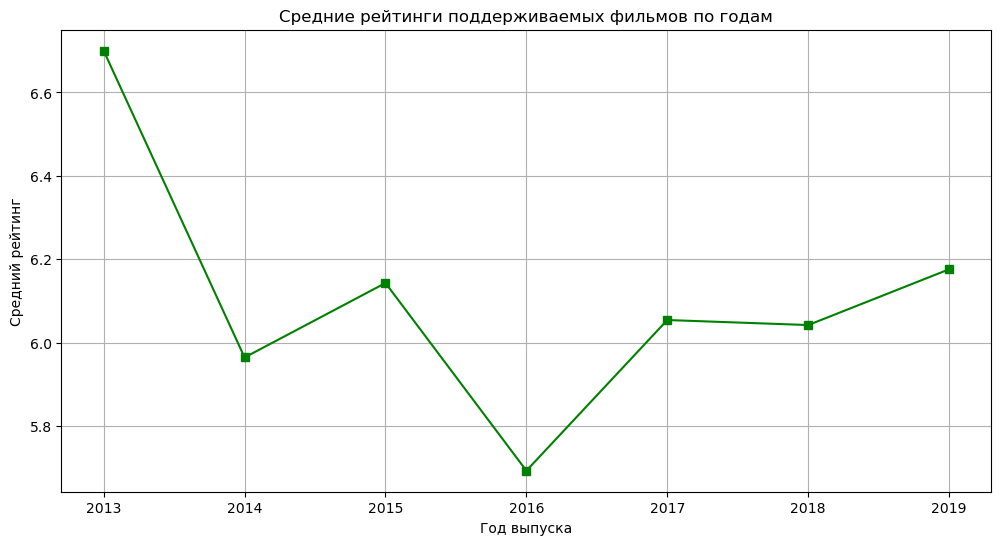

In [81]:
# График для рейтингов
plt.figure(figsize=(12, 6))
plt.plot(grouped['year_of_release'], grouped['ratings'], color='green', marker='s')
plt.title('Средние рейтинги поддерживаемых фильмов по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.show()

- Господдержка достигла пика в 2017 году, затем наблюдается некоторое снижение, но она остается относительно высокой по сравнению с начальным периодом (2014-2015 года).
- Существенный рост кассовых сборов начинается с 2016 года и достигает максимума в 2017 году, что может коррелировать с увеличением господдержки. Сборы 2017 года значительно превышают предыдущие годы, что подчеркивает успешность фильмов, выпущенных в этот период. После 2017 года сборы снижаются, но все еще остаются на уровне выше, чем до 2016 года включительно.
- Рейтинги фильмов остаются относительно стабильными в диапазоне от 5.7 до 6.7 баллов. Наивысший средний рейтинг наблюдается в 2013 году, что интересно, учитывая относительно низкие кассовые сборы в этот период. В годы с высокими кассовыми сборами рейтинги немного колеблются, но остаются в рамках одного балла, что указывает на некоторую консистенцию в восприятии качества фильмов с господдержкой.

Существует видимая корреляция между увеличением государственной поддержки и ростом кассовых сборов, особенно заметная в 2017 году. Это может свидетельствовать о том, что государственные инвестиции в кино стимулируют коммерческий успех фильмов.<br>
Стабильность рейтингов, несмотря на значительные колебания в кассовых сборах и господдержке, может указывать на то, что господдерживаемые фильмы могут ориентироваться не только на коммерческий успех, но и на достижение культурных, образовательных целей или развитие отечественного кинопроизводства.

## Общий вывод

Была выполнена работа "Исследование данных о российском кинопрокате".
<br>
В ходе анализа данных о российских кинофильмах было выполнено несколько ключевых задач, направленных на понимание и интерпретацию различных аспектов кинопроизводства и его коммерческой успешности.
<br>
Работа была разделена на несколько этапов:
- Объединение двух датасетов в один датафрейм с предварительной обработкой столбца, по которому производилось соединение.
- Предобработка данных: изменены типы столбцов там, где это было логично, произведена очистка данных, включая устранение пробелов у категориальных переменных, а так же заполнены пропущенные значения в столбцах, таких как студия, страна производства, режиссёры, продюсеры и жанры специальным значением для сохранения объёма данных.
- Создание столбцов с годом проката, главным режиссёром и основным жанром для более глубокого анализа, а так же рассчитана доля государственной поддержки от общего бюджета фильмов.
- Изучение динамика кассовых сборов по годам и по возрастным категориям. Выявили, что фильмы с возрастным ограничением «16+» и «12+» зачастую приносят больше всего сборов.
- Оценка государственной поддержки: увидели, что господдержка обычно положительно коррелирует с увеличением кассовых сборов, особенно заметно это было в 2017 году. Стабильные рейтинги фильмов с господдержкой, несмотря на их колебания, указывают на сохранение качества кинопродукции.

Таким образом, мы узнали, что кассовые сборы фильмов сильно зависят от года выпуска, жанра и возрастных ограничений. Фильмы, предназначенные для зрителей старше 12 и 16 лет, обычно показывают лучшие финансовые результаты.<br>
Вложения государства в кино могут существенно увеличивать кассовые сборы, однако важно также учитывать и другие факторы, например, маркетинг или рыночные условия.<br>
Мы пронаблюдали рост кассовых сборов и увеличение господдержки с 2013 по 2017 год, после которого последовало некоторое снижение.